# Aleks + Calculus - Group 7 Project
**Members:**
1. Panti, Joseph Rey R.
2. Zalaga, Rolando JR.
3. Santos, Joaquin 
4. Robles, Dinel Christian P.
5. Yang, Stifler Yanic 


In [6]:
# Imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel("Aleks + Calculus DF.xlsx")
df

,Calculus Grade,SHS,Initial Algebra and Geometry Review,Initial Graphs and Functions,Initial Polynomial and Rational Functions,Initial Exponential and Logarithmic Functions,Initial Trigonometric Identities and Equations,Initial Systems of Equations and Matrices,Initial Conic Sections,Weighted Initial Grade,Post Algebra and Geometry Review,Post Graphs and Functions,Post Polynomial and Rational Functions,Post Exponential and Logarithmic Functions,Post Trigonometric Identities and Equations,Post Systems of Equations and Matrices,Post Conic Sections,Weighted Latest Grade
0,5.00,0,0.42,0.10,0.00,0.00,0.00,0.00,0.00,0.0520,0.42,0.10,0.00,0.00,0.00,0.00,0.00,0.0520
1,3.00,0,0.77,0.25,0.13,0.27,0.00,0.12,0.21,0.2105,0.84,0.59,0.63,0.82,0.29,0.12,0.32,0.4665
2,5.00,0,0.88,0.67,0.19,0.91,0.36,0.18,0.26,0.4130,0.93,0.98,0.69,1.00,0.71,0.65,0.58,0.7525
3,5.00,0,0.49,0.04,0.00,0.09,0.00,0.00,0.00,0.0620,0.71,0.69,0.69,0.55,0.50,0.06,0.00,0.4200
4,5.00,0,0.96,0.78,0.38,0.91,0.64,0.41,0.74,0.6300,0.96,1.00,1.00,1.00,0.79,0.71,0.84,0.8825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,3.00,0,0.20,0.10,0.00,0.00,0.00,0.00,0.00,0.0300,0.75,0.61,0.44,0.82,0.43,0.06,0.11,0.3990
1984,3.00,0,0.61,0.06,0.00,0.18,0.00,0.00,0.05,0.0925,0.71,0.86,0.63,0.91,0.57,0.00,0.16,0.4835
1985,2.25,0,0.55,0.20,0.00,0.27,0.00,0.00,0.21,0.1335,0.81,0.84,0.75,1.00,0.57,0.00,0.63,0.5950
1986,3.00,0,0.22,0.16,0.00,0.00,0.00,0.00,0.00,0.0380,0.78,0.67,0.56,0.91,0.71,0.24,0.58,0.5895


In [8]:
list(df.columns)

['Calculus Grade',
 'SHS',
 'Initial Algebra and Geometry Review',
 'Initial Graphs and Functions',
 'Initial Polynomial and Rational Functions',
 'Initial Exponential and Logarithmic Functions',
 'Initial Trigonometric Identities and Equations',
 'Initial Systems of Equations and Matrices',
 'Initial Conic Sections',
 'Weighted Initial Grade',
 'Post Algebra and Geometry Review',
 'Post Graphs and Functions',
 'Post Polynomial and Rational Functions',
 'Post Exponential and Logarithmic Functions',
 'Post Trigonometric Identities and Equations',
 'Post Systems of Equations and Matrices',
 'Post Conic Sections',
 'Weighted Latest Grade']

In [9]:
df.dtypes

Calculus Grade                                    float64
SHS                                                 int64
Initial Algebra and Geometry Review               float64
Initial Graphs and Functions                      float64
Initial Polynomial and Rational Functions         float64
Initial Exponential and Logarithmic Functions     float64
Initial Trigonometric Identities and Equations    float64
Initial Systems of Equations and Matrices         float64
Initial Conic Sections                            float64
Weighted Initial Grade                            float64
Post Algebra and Geometry Review                  float64
Post Graphs and Functions                         float64
Post Polynomial and Rational Functions            float64
Post Exponential and Logarithmic Functions        float64
Post Trigonometric Identities and Equations       float64
Post Systems of Equations and Matrices            float64
Post Conic Sections                               float64
Weighted Lates

In [10]:
df.isnull().sum()

Calculus Grade                                    0
SHS                                               0
Initial Algebra and Geometry Review               0
Initial Graphs and Functions                      0
Initial Polynomial and Rational Functions         0
Initial Exponential and Logarithmic Functions     0
Initial Trigonometric Identities and Equations    0
Initial Systems of Equations and Matrices         0
Initial Conic Sections                            0
Weighted Initial Grade                            0
Post Algebra and Geometry Review                  0
Post Graphs and Functions                         0
Post Polynomial and Rational Functions            0
Post Exponential and Logarithmic Functions        0
Post Trigonometric Identities and Equations       0
Post Systems of Equations and Matrices            0
Post Conic Sections                               0
Weighted Latest Grade                             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(37)

# Data Cleaning

In [12]:
#removing of duplicates 
df = df.drop_duplicates()
df = df.reset_index(drop= True)
df.duplicated().sum()

np.int64(0)

In [13]:
#check for missing values
df.isnull().sum()
#no missing values at all

Calculus Grade                                    0
SHS                                               0
Initial Algebra and Geometry Review               0
Initial Graphs and Functions                      0
Initial Polynomial and Rational Functions         0
Initial Exponential and Logarithmic Functions     0
Initial Trigonometric Identities and Equations    0
Initial Systems of Equations and Matrices         0
Initial Conic Sections                            0
Weighted Initial Grade                            0
Post Algebra and Geometry Review                  0
Post Graphs and Functions                         0
Post Polynomial and Rational Functions            0
Post Exponential and Logarithmic Functions        0
Post Trigonometric Identities and Equations       0
Post Systems of Equations and Matrices            0
Post Conic Sections                               0
Weighted Latest Grade                             0
dtype: int64

In [ ]:
#Check for the datatype format
df.dtypes
#already same formats

Calculus Grade                                    float64
SHS                                                 int64
Initial Algebra and Geometry Review               float64
Initial Graphs and Functions                      float64
Initial Polynomial and Rational Functions         float64
Initial Exponential and Logarithmic Functions     float64
Initial Trigonometric Identities and Equations    float64
Initial Systems of Equations and Matrices         float64
Initial Conic Sections                            float64
Weighted Initial Grade                            float64
Post Algebra and Geometry Review                  float64
Post Graphs and Functions                         float64
Post Polynomial and Rational Functions            float64
Post Exponential and Logarithmic Functions        float64
Post Trigonometric Identities and Equations       float64
Post Systems of Equations and Matrices            float64
Post Conic Sections                               float64
Weighted Lates

# Exploratory Data Analysis

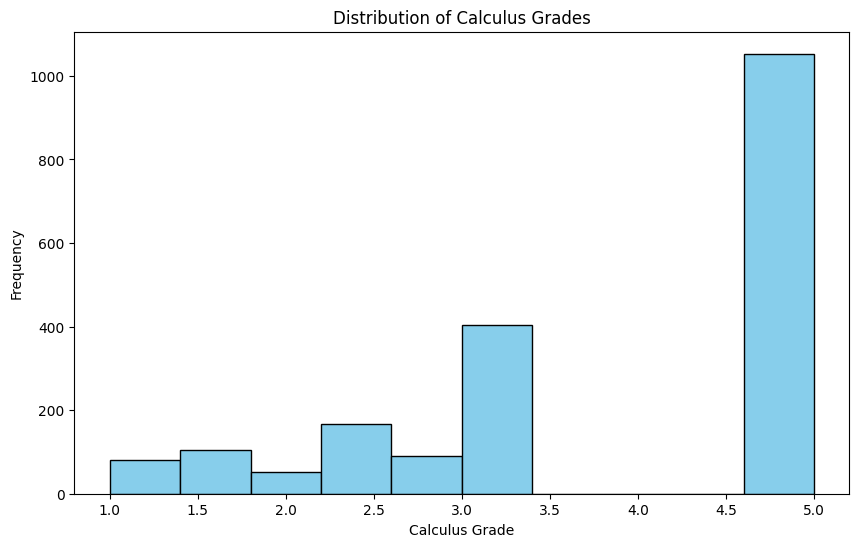

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Calculus Grade'], bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of Calculus Grades')
plt.xlabel('Calculus Grade')
plt.ylabel('Frequency')

plt.show()
# Histogram to visualize the distribution of Calculus Grades among students.


C:\Users\rolan\AppData\Local\Temp\ipykernel_33420\666745666.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


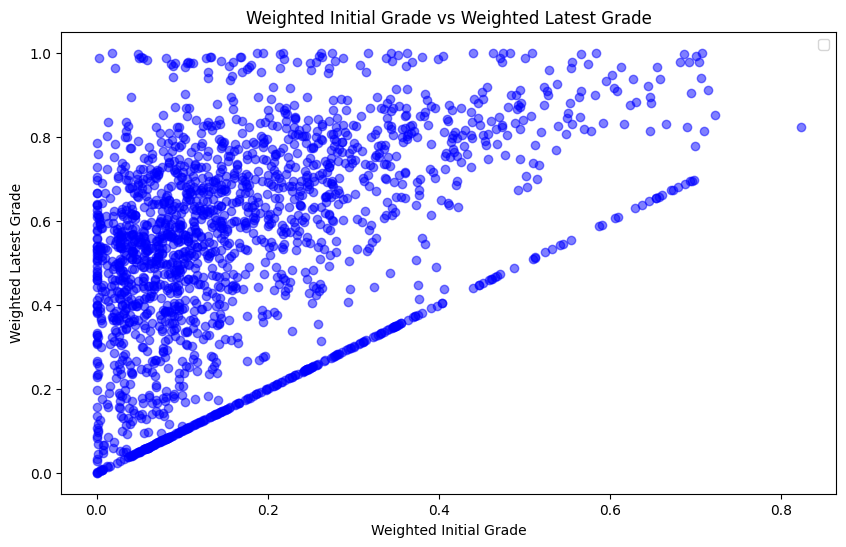

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.scatter(df['Weighted Initial Grade'], df['Weighted Latest Grade'], alpha=0.5, color='blue')


plt.title('Weighted Initial Grade vs Weighted Latest Grade')
plt.xlabel('Weighted Initial Grade')
plt.ylabel('Weighted Latest Grade')
plt.legend()
plt.show()

#This helps us see if students improved after taking the modules
#Scatter plot to visualize the relationship between students
#  Weighted Initial Grade and Weighted Latest Grade.


# Preprocessing

# Report